In [42]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [32]:
df = pd.read_csv("rfmUsingData.csv")
df

,Customer_id;Date;Amount;Bought
113;15.08.1990;27,29;Android
64;16.08.1990;24,48;Android
49;18.08.1990;37,21;Apple
54;18.08.1990;40,95;Apple
83;18.08.1990;9,02;Android
...,...
100;19.07.2010;13,51;Android
104;29.09.2010;11,94;Android
13;22.01.2011;3,53;Android
16;07.06.2011;48,66;Apple


In [33]:
pd.set_option("display.max_columns",100)

In [34]:
df = pd.read_csv("rfmUsingData.csv",
                 sep=";",
                 decimal=',',
                 parse_dates=["Date"])

c:\Users\eneso\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15.08.1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\eneso\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '16.08.1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\eneso\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '18.08.1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\eneso\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '20.08.1990' in DD/MM/YYYY format. Provide format or specif

In [35]:
print(f"row count {df.shape[0]} ve attribute count {df.shape[1]}")

row count 635 ve attribute count 4


In [36]:
df.head()

,Customer_id,Date,Amount,Bought
0,113,1990-08-15,27.29,Android
1,64,1990-08-16,24.48,Android
2,49,1990-08-18,37.21,Apple
3,54,1990-08-18,40.95,Apple
4,83,1990-08-18,9.02,Android


In [37]:
df.isnull().sum()

Customer_id    0
Date           0
Amount         0
Bought         0
dtype: int64

In [38]:

len(df["Customer_id"].unique())

117

In [39]:
df["Bought"].value_counts()

Android          399
Apple            232
Windows Phone      4
Name: Bought, dtype: int64

In [40]:
df["Amount"].describe()

count    635.000000
mean      20.192898
std       12.030023
min        0.140000
25%        9.565000
50%       20.160000
75%       28.800000
max       48.890000
Name: Amount, dtype: float64

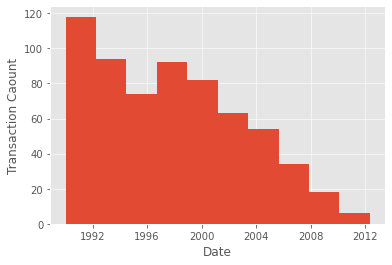

In [54]:
plt.style.use('ggplot')
plt.hist(df['Date'],bins=10,)
plt.grid(alpha=0.75)
plt.xlabel("Date")
plt.ylabel("Transaction Caount")
plt.show()

In [55]:
print(df['Date'].min(), df['Date'].max())

1990-01-09 00:00:00 2012-05-04 00:00:00


In [56]:
sonTarih = dt.datetime(2012,5,4)

In [62]:
df['Day_Dif']=sonTarih - df['Date']
df['Day_Dif'].astype('timedelta64[D]')

df['Day_Dif']=df['Day_Dif'] / np.timedelta64(1, 'D')
df.head()

,Customer_id,Date,Amount,Bought,Day_Dif
0,113,1990-08-15,27.29,Android,7933.0
1,64,1990-08-16,24.48,Android,7932.0
2,49,1990-08-18,37.21,Apple,7930.0
3,54,1990-08-18,40.95,Apple,7930.0
4,83,1990-08-18,9.02,Android,7930.0


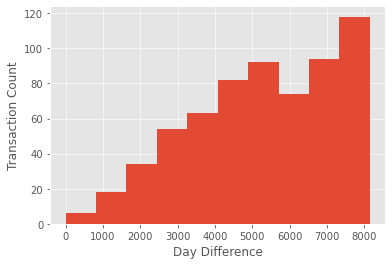

In [63]:
plt.hist(df['Day_Dif'])
plt.grid(alpha=0.75)
plt.xlabel("Day Difference")
plt.ylabel("Transaction Count")
plt.show()

In [64]:
df=df[df['Day_Dif'] >= 1000]
print(f"row count: {df.shape[0]}")

row count: 626


In [65]:
rfmTable = df.groupby('Customer_id').agg(
    {'Day_Dif': lambda x:x.min(), # Recency
     'Customer_id': lambda x: len(x), # Frequency
     'Amount': lambda x: x.sum()}) # Monetary Value

In [66]:
rfmTable.rename(columns=
                {'Day_Dif': 'recency',
                 'Customer_id': 'frequency',
                 'Amount': 'monetary_value'},
                inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
Customer_id,,,
1,2050.0,7,128.46
2,1158.0,6,150.70
3,4079.0,4,81.19
4,1080.0,7,152.33
5,5140.0,4,51.09


In [67]:
quart = rfmTable.quantile(q=[0.25,0.50,0.75]).to_dict()
print(quart)

{'recency': {0.25: 2131.0, 0.5: 3032.0, 0.75: 4170.0}, 'frequency': {0.25: 4.0, 0.5: 5.0, 0.75: 6.0}, 'monetary_value': {0.25: 79.61999999999999, 0.5: 104.03999999999999, 0.75: 134.9}}


In [68]:
# {
#   'recency':
#       {
#       0.25: 2131.0,
#       0.5: 3032.0,
#       0.75: 4170.0
#       },
#  'frequency':
#      {
#      0.25: 4.0,
#      0.5: 5.0,
#      0.75: 6.0
#      },
#  'monetary_value':
#      {
#      0.25: 79.61,
#      0.5: 104.04,
#      0.75: 134.9
#      }
# }

In [69]:
def RClass(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMClass(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [70]:
rfmSeg = rfmTable
rfmSeg['R_Quartile'] = rfmSeg['recency'].apply(RClass, args=('recency', quart,))
rfmSeg['F_Quartile'] = rfmSeg['frequency'].apply(FMClass, args=('frequency', quart,))
rfmSeg['M_Quartile'] = rfmSeg['monetary_value'].apply(FMClass, args=('monetary_value', quart,))

In [71]:
rfmSeg['RFMScore'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [72]:
rfmSeg.RFMScore.head()
# Customer
# 1      112
# 2      121
# 3      343
# 4      111
# 5      444


Customer_id
1    112
2    121
3    343
4    111
5    444
Name: RFMScore, dtype: object

In [73]:
rfmSeg.groupby('RFMScore').agg('monetary_value').mean().sort_index()

RFMScore
111    167.756000
112    124.341429
121    156.295000
122    128.675000
123     91.600000
124     64.465000
134     68.790000
211    149.120000
212    107.940000
221    159.029091
222    119.214000
223     88.413333
224     69.050000
232    114.887500
233     99.955000
322    121.750000
323     85.700000
324     74.510000
332    118.305000
333     92.253750
334     64.922857
342    116.645000
343     81.190000
344     64.460000
434     77.090000
441    150.690000
442    113.633333
443     93.888182
444     56.430769
Name: monetary_value, dtype: float64